# Institute for Future Intelligence & Lehigh University (2023)

## Data Processing, Clustering and Epistemic Network Analysis - Report

---

## **Outline**

**1. Report Summary**

**2. Data Description**
    1. Pre- and Post- Survey Data
        1. ID
        2. Knowledge_gains
        3. DC_gains (DC - Design Competence)
    2. Solar Farm Log Data
        1. ID
        2. Action
        3. Coded Action 
    3. Coding Design Scheme
        1. Category Data Distribution
        2. All Actions under Categories

**3. Merging Pre-Survey and Post-Survey Data**
    1. Coding Script for Matching Participants
    2. Testing Coding Script
    
**4. Solar Farm Log Data Processing with the Coding Scheme**
    1. Description
    2. Coding Script for Categorizing Data
    3. Testing Coding Script
        
**5. Data Clustering**
    1. Coding Script for KModes Clustering
    2. Cluster Data Distributions
    
**6. Epistemic Network Analysis (ENA)**
    1. Coding Script for ENA
    2. Visualization: Description
        1. Edges
        2. Nodes
        3. SVD1 and SVD2
    3. Results: Interpretation

**NOTE**: Additional notes/action items/questions are noted using bolded brackets **[]** and referenced at the end of each section. These need to be clarified before approving the results in this report.

---

### 1. Report Summary

In this report we first process the data from participants of the study, involving their interaction with [Aladdin](https://intofuture.org/aladdin.html) solar farm design software, as well as their surveyed pre- and post- evaluation of the design learning process. 

We cluster all of the surveyed participants (N=166) into 3 groups based on computed values of *Knowledge_gains* and *DC_gains* (Design Competence), using KModes clustering approach. This approach is most applicable in the context of our data, as *Knowledge_gains* takes on discrete numerical values (which can be treated as categorical), while *DC_gains* includes continuous numerical values. 

We transform the software log data with participants'(N=100) actions, coding them into specific groups of actions based on pre-defined [coding scheme](https://www.dropbox.com/s/bnw2fawydg4rbl2/Action%20Coding%20scheme%20%28Final%29.xlsx?dl=0) **[1]**.

We then use the clustering results and tranformed log data to run [Epistemic Network Analysis](https://www.epistemicnetwork.org/)(ENA) for participants (N=85) who completed both surveying and designing activities, intending to evaluate the strengths of associations between participants' *Knowledge_gains*, *DC_gains*, and different categories of actions performed when creating solar farm designs.

**[1] TO-DO**: Create a separate folder for public-facing datasets, if possible (e.g., for study replication).

### 2. Data Description

We work with the following data sources: 

[Pre- and Post- Survey Data](https://www.dropbox.com/scl/fi/r3xvu2na2zco12yyr5gun/all_survey_data.csv?rlkey=clzatcyuai7d74v720urtfgd3&dl=0) **[1]**
    1. ID: Represents a study participant's ID. 
    2. Knowledge_gains: Computed, represents knowledge gains.
    3. DC_gains: Computed, represents design competence gains.
   
[Solar Farm Log Data](https://www.dropbox.com/scl/fi/3w3s1mklf1kpmgyplzdou/Solar-farm_log-data_three-schools.xlsx?rlkey=fnc9bnor7qe42ouxbuk8wwfco&dl=0) **[2]**
    1. ID: Represents a study participant's ID. 
    2. Action: Represents a user action in Aladdin.
    3. Coded Action: Computed, represents a category of the user action.
    
[Coding Design Scheme](https://www.dropbox.com/s/bnw2fawydg4rbl2/Action%20Coding%20scheme%20%28Final%29.xlsx?dl=0) **[3]**
    1. Action: Represents a user action in Aladdin.
    2. Code: Assigned, represents a category of the user action, which can be one of the categories below:
    
        1. Explore Task Relevant Features (ERF): 
            Actions that help students understand design variables
            
        2. Explore Task Irrelevant Features (EIF): 
            Actions that are not related to the task
            
        3. Run Relevant Simulation (RRS): 
            Run the correct simulation
            
        4. Run Irrelevant Simulation (RIS): 
            Run the incorrect simulation
            
        5. Change Relevant Parameters (CRP): 
            Change design varibles
            
        6. Change Irrelevant Parameters (CIP): 
            Change unrelated variables
            
        7. House Keeping Actions (HKA): 
            Required actions but not directly related to the task
            
        8. (notification): 
            Not a user action
    
**[1]**, **[2]**, **[3]**: These links need to be shared to be accessed, if needed.

**Coding Design Scheme: Categories Data Distribution**

                               Code  Action_Count Action_Percentage
1             House Keeping Actions            23            27.71%
2        Change Relevant Parameters            20            24.10%
3  Explore Task Irrelevant Features            17            20.48%
4     Expore Task Relevant Features            10            12.05%
5           Run Relevant Simulation             9            10.84%
6                    (Notification)             3             3.61%
7      Change Irrelevant Parameters             1             1.20%


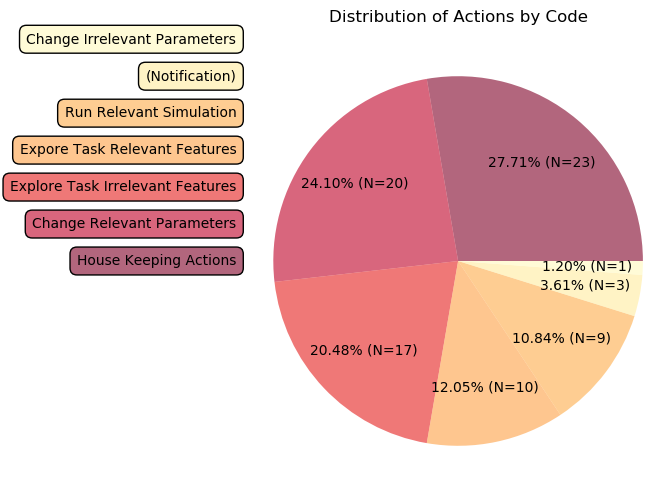

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_excel('Coding Scheme.xlsx')

# Standardize the 'Code' column by converting it to lower case and capitalize
df['Code'] = df['Code'].str.lower().str.title()

# Count the frequency of each code
code_counts = df['Code'].value_counts()

# Create a new dataframe to summarize the data and calculate the Action percentages
summary_df = pd.DataFrame({
    'Code': code_counts.index,
    'Action_Count': code_counts.values
})
total_actions = summary_df['Action_Count'].sum()
summary_df['Action_Percentage'] = (summary_df['Action_Count'] / total_actions) * 100

# Sort DataFrame in descending order by 'Action_Count'
summary_df.sort_values('Action_Count', ascending=False, inplace=True)

# Reset index and start indexing from 1
summary_df.reset_index(drop=True, inplace=True)
summary_df.index += 1

# Display the DataFrame with Action_Percentage values formatted as NN.NN%
print(summary_df.to_string(formatters={'Action_Percentage': '{:.2f}%'.format}))

# Define custom autopct function
def custom_autopct(pct):
    val = round(pct * total_actions / 100.0)
    return f'{pct:.2f}% (N={val})'

# Create a colormap with varying shades of warm yellow
colors = plt.cm.YlOrRd(summary_df['Action_Count'] / float(max(summary_df['Action_Count'])))
colors = colors[:, :3]  # Ignore the alpha channel for transparency

# Make the colors more transparent
alpha_value = 0.6
colors_with_transparency = np.append(colors, alpha_value * np.ones((len(summary_df), 1)), axis=1)

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size
wedges, _, autotexts = ax.pie(summary_df['Action_Count'], autopct=custom_autopct, colors=colors_with_transparency, pctdistance=0.7)

# Change the font color of autopct labels to black
for autotext in autotexts:
    autotext.set_color('black')

# Draw labels out and increase distance between labels, position them in the center right
for i, p in enumerate(wedges):
    ax.text(-1.2, i * 0.2, f"{summary_df['Code'].iloc[i]}",  # Increase distance between labels
            va='center', ha='right', bbox=dict(facecolor=colors_with_transparency[i], edgecolor='black', boxstyle='round,pad=0.5'))

ax.set_xlim([-1, 1])  # Adjust x-axis to make space for labels

plt.title('Distribution of Actions by Code')
plt.show()

**Coding Design Scheme: All Actions under Categories**

In [2]:
# Count the frequency of each code
code_counts = df['Code'].value_counts()

# Group the actions by code and sort them
actions_by_code = df.groupby('Code')['Action'].apply(lambda x: sorted(list(x))).reset_index()

# Sort by action count in descending order
actions_by_code['Action_Count'] = actions_by_code['Code'].map(code_counts)
actions_by_code = actions_by_code.sort_values('Action_Count', ascending=False)

# Capitalize the 'Code' column
actions_by_code['Code'] = actions_by_code['Code'].str.title()

# Print each row separately
for _, row in actions_by_code.iterrows():
    print(f"Code: {row['Code']}")
    print(f"Action Count: {row['Action_Count']}")
    for i, action in enumerate(row['Action'], 1):
        print(f"{i}. {action}")
    print("\n")

Code: House Keeping Actions
Action Count: 23
1. Cancel Evolution
2. Cancel Simulation
3. Clear Scene
4. Close Solar Panel Daily Yield Graph
5. Close Solar Panel Optimization Graph
6. Close Solar Panel Yearly Yield Graph
7. Close Sun and Time Settings Panel
8. Create New File
9. List Cloud Files
10. Lock
11. Open Local File
12. Pause Evolution
13. Pause Simulation
14. Redo
15. Resume Evolution
16. Save Cloud File
17. Save as Cloud File
18. Save as Local File
19. Set 2D View
20. Take Screenshot
21. Take Screenshot of Solar Panel Yearly Yield Graph
22. Undo
23. Zoom


Code: Change Relevant Parameters
Action Count: 20
1. Add
2. Copy
3. Cut
4. Delete
5. Move
6. Paste by Key
7. Paste to Point
8. Resize
9. Rotate
10. Set Length for All Solar Panel Arrays on Surface
11. Set Relative Azimuth for All Solar Panel Arrays
12. Set Solar Panel Array Relative Azimuth
13. Set Solar Panel Array Tilt Angle
14. Set Solar Panel Array Width
15. Set Solar Panel Tilt Angle
16. Set Tilt Angle for All Solar Pan

**Solar Farm Design Log Data Summary (by Categories):**

Total unique participants: 100
RRS    1550
CRP    1526
HKA     949
ERF     292
EIF      69
CIP       7
Name: Coded Action, dtype: int64


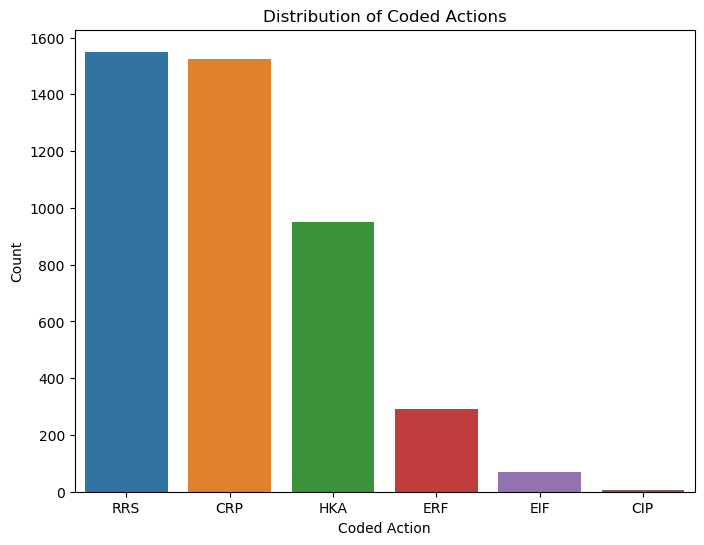

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("solar_farm_log_data.csv")

# Count the total unique participants
unique_participants = df['ID'].nunique()
print(f'Total unique participants: {unique_participants}')

# Analyze the distribution of 'Coded Action'
coded_action_counts = df['Coded Action'].value_counts().sort_values(ascending=False)
print(coded_action_counts)

# Plot the distribution of 'Coded Action'
plt.figure(figsize=(8,6))  # Increase figure size
sns.countplot(data=df, x='Coded Action', order=df['Coded Action'].value_counts().index)
plt.title('Distribution of Coded Actions')
plt.ylabel('Count')  # Changed from xlabel to ylabel
plt.xlabel('Coded Action')  # Changed from ylabel to xlabel
plt.show()

run yearly simulation for solar panels              1298
solar panel array layout                            1198
close solar panel yearly yield graph                 407
save as cloud file                                   165
show sun and time settings panel                     127
                                                    ... 
set length for all solar panel arrays on surface       1
pause simulation                                       1
change wall height                                     1
change people                                          1
run visibility analysis for solar panels               1
Name: Action, Length: 80, dtype: int64


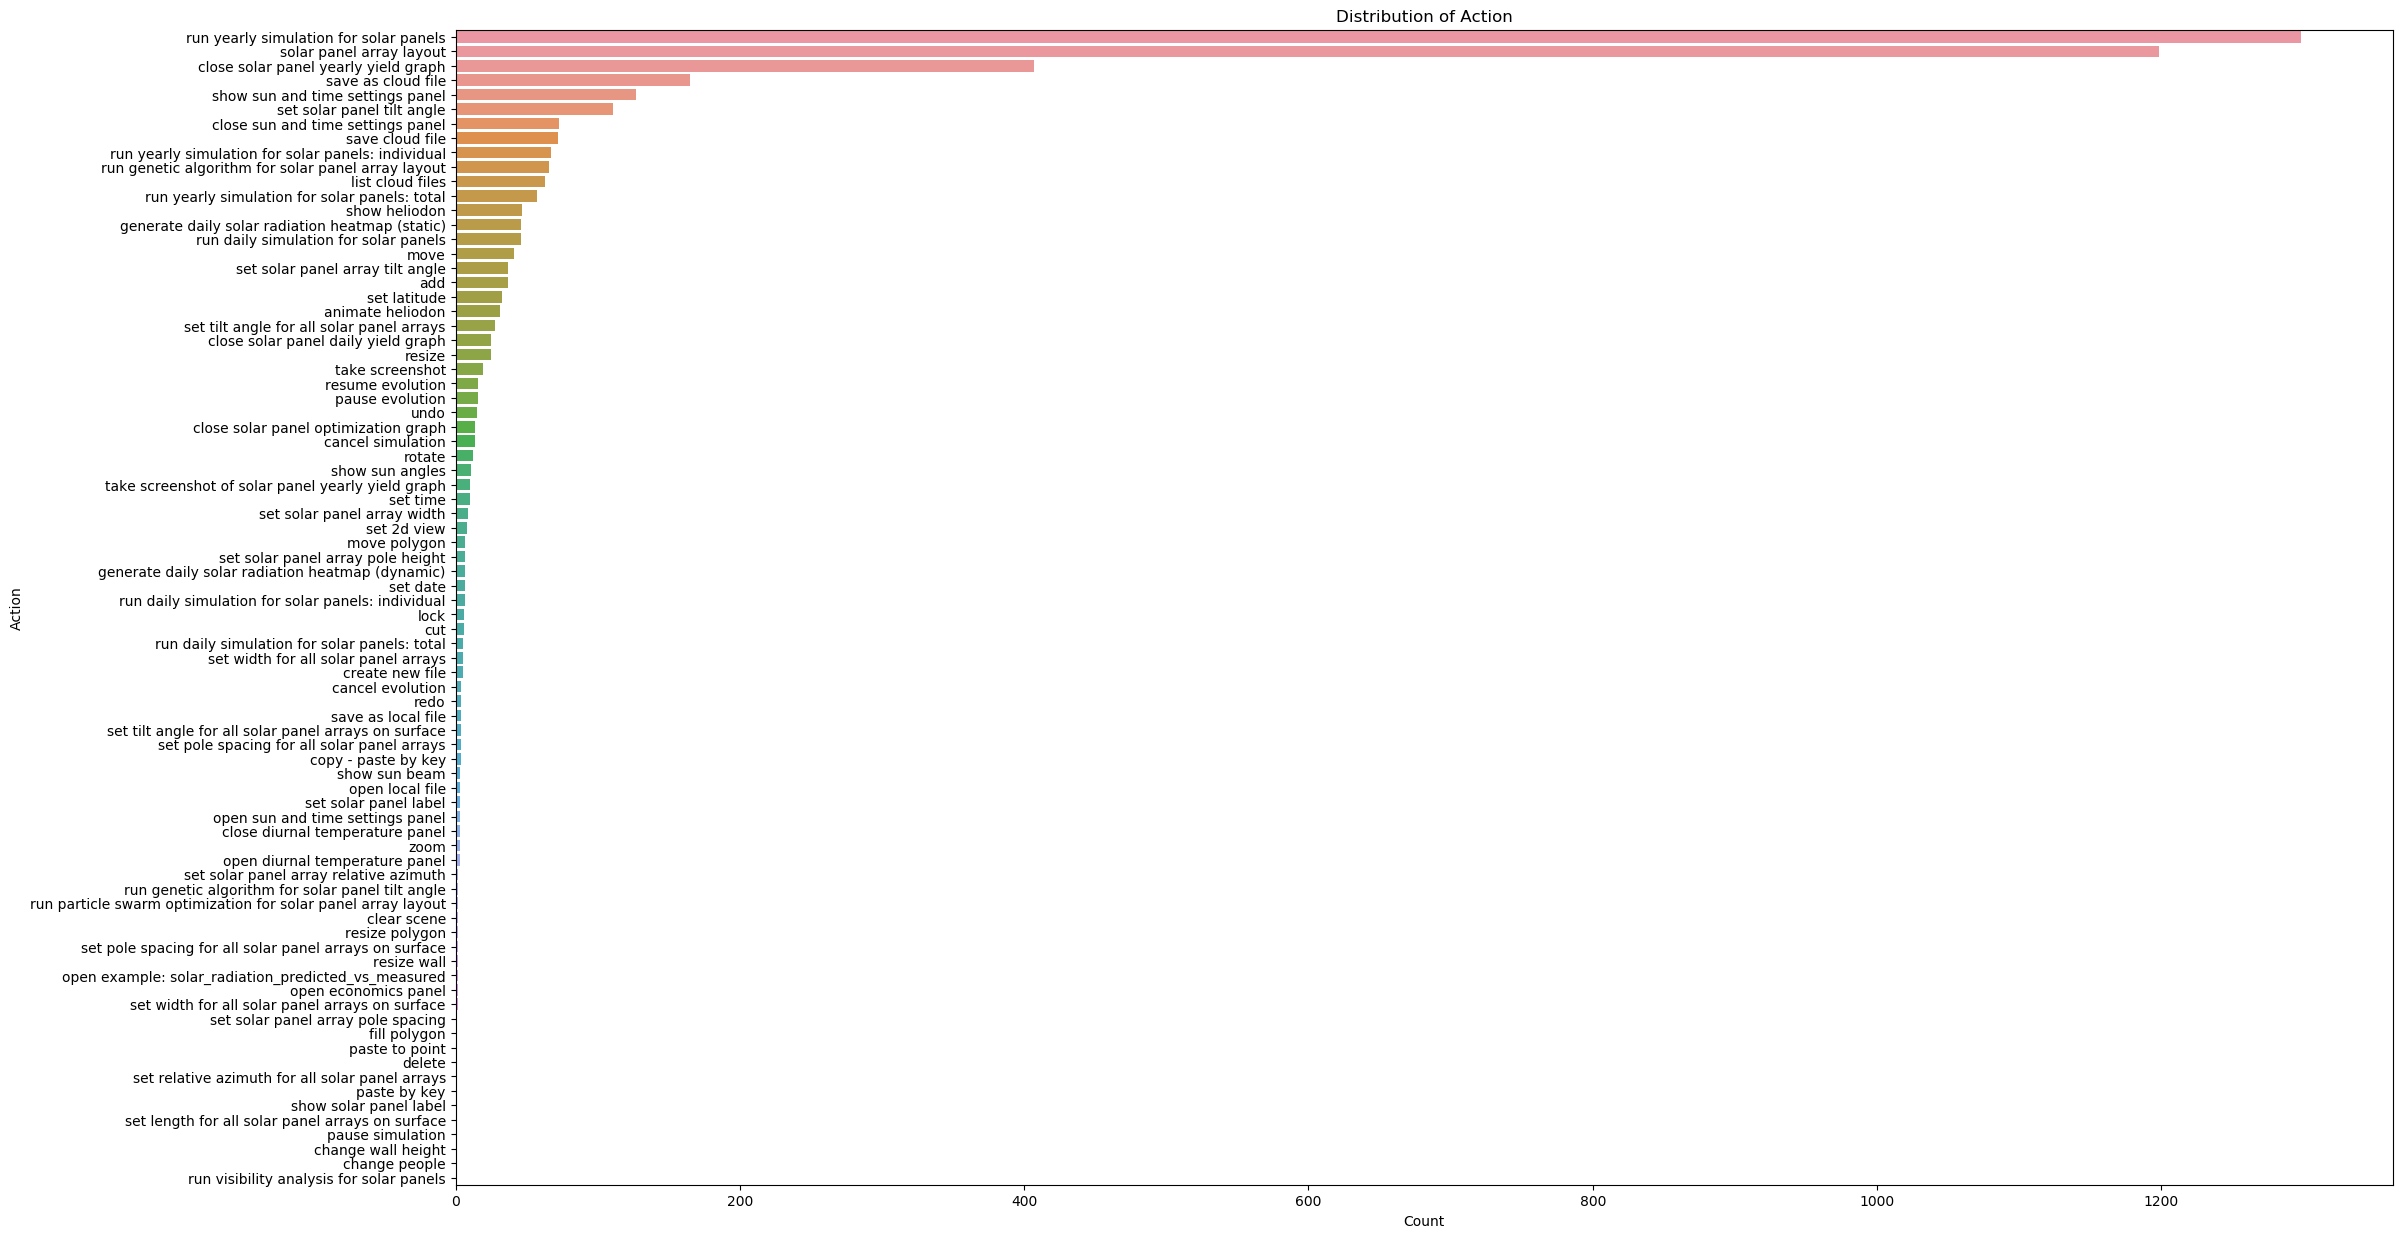

In [4]:
# Analyze the distribution of 'Action'
action_counts = df['Action'].value_counts().sort_values(ascending=False)
print(action_counts)

# Plot the distribution of 'Action'
plt.figure(figsize=(25,15))
sns.countplot(data=df, y='Action', order=df['Action'].value_counts().index)
plt.title('Distribution of Action')
plt.xlabel('Count')
plt.ylabel('Action')
plt.show()

## 3. Merging Pre-Survey and Post-Survey Data
### Coding Script for Matching Participants

In [5]:
import pandas as pd

# Define the path to your Excel file
excel_file_path = "pre_post survey.xlsx"

# Read the Excel file into a pandas DataFrame
xls = pd.ExcelFile(excel_file_path)

# Read the first tab (pre-survey data) into a DataFrame
pre_survey_df = pd.read_excel(xls, 'Pre-survey Data')

# Read the second tab (post-survey data) into a DataFrame
post_survey_df = pd.read_excel(xls, 'Post-survey data')

# Merge the two DataFrames based on the "ID" column
merged_df = pd.merge(pre_survey_df, post_survey_df, on='ID')

# Check the number of matched and unmatched participants
matched_count = merged_df['ID'].count()
unmatched_count = merged_df['ID'].isna().sum()

# Calculate summary statistics of matched participants
matched_stats = merged_df.dropna().describe()

# Save the merged DataFrame as a CSV file
merged_df.to_csv("all_survey_data.csv", index=False)

print("Merged data saved as 'all_survey_data.csv'.")

Merged data saved as 'all_survey_data.csv'.


### Testing Coding Script

In [6]:
# Print the summary statistics and counts
print("Summary Statistics for Matched Participants:")
print(matched_stats)
print("\nNumber of Matched Participants:", matched_count)
print("Number of Unmatched Participants:", unmatched_count)

Summary Statistics for Matched Participants:
       What is your age?    Pre_Q1     Pre_Q2     Pre_Q3     Pre_Q4  \
count          92.000000  92.00000  92.000000  92.000000  92.000000   
mean           17.108696   0.23913   0.217391   0.282609   0.336957   
std             0.653923   0.42889   0.414731   0.452735   0.475260   
min            15.000000   0.00000   0.000000   0.000000   0.000000   
25%            17.000000   0.00000   0.000000   0.000000   0.000000   
50%            17.000000   0.00000   0.000000   0.000000   0.000000   
75%            18.000000   0.00000   0.000000   1.000000   1.000000   
max            18.000000   1.00000   1.000000   1.000000   1.000000   

          Pre_Q5     Pre_Q6    Pre_12Q1    Pre_12Q2    Pre_12Q3  ...  \
count  92.000000  92.000000   92.000000   92.000000   92.000000  ...   
mean    0.532609   0.434783   29.891304   41.086957   45.760870  ...   
std     0.501669   0.498445   25.136750   25.994781   26.899638  ...   
min     0.000000   0.000000

## 4. Solar Farm Log Data Processing with the Coding Scheme
### Description

The following code script cleans and transforms the solar farm design log data, assigning coding categories to actions; such categories include:

(1) "Explore Relevant Features" (abbreviated as ERF)

(2) "Explore Irrelevant Features" (abbreviated as EIF)

(3) "Run Relevant Simulation" (abbreviated as RRS)

(4) "Run Irrelevant Simulation" (abbreviated as RIS)

(5) "Change Relevant Parameters" (abbreviated as CRP)

(6) "Change Irrelevant Parameters" (abbreviated as CIP)

(7) "House Keeping Actions" (abbreviated as HKA)

It also discards single "Copy" actions (ones not followed by "Paste..."), and actions falling under "notification" category.

*Link References:*

(1) [Coding Scheme](https://www.dropbox.com/home/Epistemic%20Network%20Analysis?preview=Action+Coding+scheme+%28Final%29.xlsx)

(2) [Log Data File](https://www.dropbox.com/home/Epistemic%20Network%20Analysis?preview=Solar+farm_log+data_three+schools.xlsx)

### Coding Script for Categorizing Data

In [7]:
#pip install pandas openpyxl numpy
import pandas as pd
import numpy as np

# Load the two excel files into pandas dataframes
df_log = pd.read_excel("solar_farm_log_data.xlsx")  # your log data
df_scheme = pd.read_excel("action_coding_scheme.xlsx")  # your coding scheme

# Transform 'Code' and 'Action' columns in the coding scheme to lowercase
df_scheme['Code'] = df_scheme['Code'].str.lower().replace(" ", "_")
df_scheme['Action'] = df_scheme['Action'].str.lower()

# Create a dictionary of Actions and their corresponding Codes
action_code_dict = pd.Series(df_scheme.Code.values, index=df_scheme.Action).to_dict()

# Transform 'Action' column in the log data to lowercase before mapping
df_log['Action'] = df_log['Action'].str.lower()

# Use the dictionary to assign the corresponding "Coded Action" to each record in the log data dataframe
df_log['Coded Action'] = df_log['Action'].map(action_code_dict)

# Handle missing data
df_log['Coded Action'] = df_log['Coded Action'].replace(np.nan, 'Undefined')

# List the actions to simplify
actions_to_simplify = ["paste by key", "add", "move", "move polygon", "delete", "rotate", "resize", "resize polygon", "resize wall", "cut", "paste to point"]

# Filter out repeated consecutive actions
df_log = df_log.loc[(df_log['Action'] != df_log['Action'].shift()) | (~df_log['Action'].isin(actions_to_simplify))]

# For copy-paste sequences, keep only the "Copy" action and discard the "Paste by Key" or "Paste to Point" action
copy_paste_mask = ((df_log['Action'] == 'copy') & (df_log['Action'].shift(-1).isin(['paste by key', 'paste to point'])))
df_log.loc[copy_paste_mask, 'Action'] = 'copy - ' + df_log['Action'].shift(-1)
df_log = df_log.loc[~((df_log['Action'] == 'copy') & (~copy_paste_mask))]

# Filter out the following "Paste by Key" or "Paste to Point" action
df_log = df_log.loc[(~copy_paste_mask.shift(fill_value=False)) | (copy_paste_mask)]

# Create a dictionary of categories and their abbreviations
category_abbrev_dict = {"explore task relevant features": "ERF",
                        "expore task relevant features": "ERF",
                        "explore task irrelevant features": "EIF",
                        "run relevant simulation": "RRS",
                        "run irrelevant simulation": "RIS",
                        "change relevant parameters": "CRP",
                        "change irrelevant parameters": "CIP",
                        "house keeping actions": "HKA",
                        "(notification)": "NTF"}

# Use the dictionary to abbreviate the "Coded Action" categories
df_log['Coded Action'] = df_log['Coded Action'].map(category_abbrev_dict).fillna(df_log['Coded Action'])

# Discard entries that are categorized as "notification"
df_log = df_log[df_log['Coded Action'] != 'NTF']

# Save the dataframe back to a CSV file
df_log.to_csv("solar_farm_log_data.csv", index=False)

In [8]:
# Add the manually created actions to the coding scheme
new_actions = ['copy - paste by key', 'copy - paste to point']
new_codes = [action_code_dict['copy']]*len(new_actions)  # use the same code as 'copy' action

df_scheme = df_scheme.append(pd.DataFrame({'Action': new_actions, 'Code': new_codes}), ignore_index=True)

# Update the dictionary
action_code_dict = pd.Series(df_scheme.Code.values, index=df_scheme.Action).to_dict()

### Testing Coding Script

In [9]:
# Check if all the actions in your log data exist in the coding scheme:
missing_actions = df_log.loc[~df_log['Action'].isin(df_scheme['Action']), 'Action'].unique()
assert len(missing_actions) == 0, f"These actions are missing in the coding scheme: {missing_actions}"

# Check if all actions in the log data have a corresponding coded action:
assert df_log['Coded Action'].isnull().sum() == 0, "There are actions in the log data that were not coded"

# Check if there are no consecutive repeated actions left:
assert not ((df_log['Action'] == df_log['Action'].shift()) & df_log['Action'].isin(actions_to_simplify)).any(), "There are still consecutive repeated actions in the data"

# Check if the 'notification' category was correctly removed:
assert 'NTF' not in df_log['Coded Action'].unique(), "The 'notification' category was not correctly removed"

## 5. Data Clustering

**Pre-Processing Data**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load your data
df = pd.read_excel("all_survey_data_2023_07_25.xls")
# Load the second dataset
df2 = pd.read_csv('solar_farm_log_data.csv')

# Identify the overlapping records
common_ids = set(df['ID']).intersection(set(df2['ID']))

# Filter the original DataFrame to only include the overlapping records
df_common = df[df['ID'].isin(common_ids)]

In [11]:
# Select the two variables
data = df_common[["DC_gains", "Knowledge_gains"]]

# Remove rows with missing data
data_clean = data.dropna()

# Display data
data.head(5)

,DC_gains,Knowledge_gains
1,-25.0,1
2,-10.0,2
5,27.5,-1
6,5.0,-1
7,-10.0,0


**Data Visualization**: The first step in our data analysis task is to understand the data. We create a scatter plot of the two variables. This will give us a visual representation of how the data points are distributed.

In [1]:
# Scatter plot
plt.scatter(data[["DC_gains"]], data[["Knowledge_gains"]])
plt.xlabel("DC Gains")
plt.ylabel("Knowledge Gains")
plt.show()

NameError: name 'plt' is not defined

**Data Scaling**: Scaling is a common pre-processing task in machine learning. Clustering algorithms like K-Means are sensitive to the scales of the data. Since the ranges of your two variables are different, it would be a good idea to scale them to the same range. One common method is Z-score normalization, where we subtract the mean and divide by the standard deviation.

In [13]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Add the scaled data back into the DataFrame
data_clean["DC_gains_scaled"] = data_scaled[:, 0]
data_clean["Knowledge_gains_scaled"] = data_scaled[:, 1]

**Choosing the Right Number of Clusters**: For algorithms like K-Means, we need to specify the number of clusters beforehand. One common method to determine this is the Elbow Method. You run the algorithm with different numbers of clusters and plot the sum of squared distances from each point to its cluster center. The "elbow" point, where the plot starts descending much more slowly, is often a good choice for the number of cluster

Text(0, 0.5, 'Sum of squared distance')

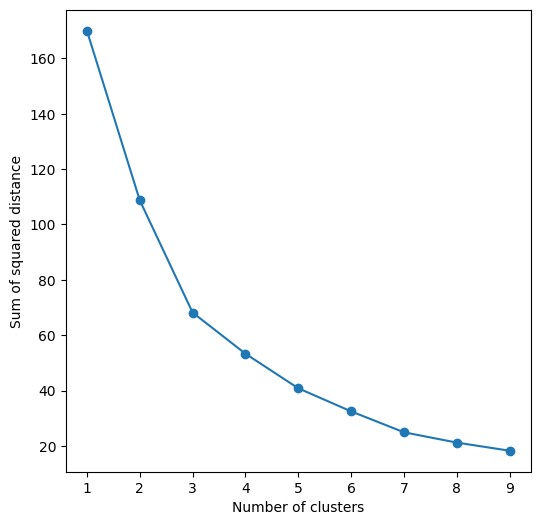

In [14]:
from sklearn.cluster import KMeans

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(data_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')

In [15]:
# Perform KMeans clustering
K=3
kmeans = KMeans(n_clusters=K)
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

**Clustering**: After deciding the number of clusters, we can run the K-Modes algorithm. Here, K is the number of clusters we have determined. In our case we will choose 3 clusters.

In [16]:
# Add the cluster labels to the cleaned DataFrame
data_clean['Cluster'] = kmeans.labels_

# Merge the cluster information back to the original DataFrame
df = df.merge(data_clean['Cluster'], left_index=True, right_index=True, how='left')

# Save the DataFrame to a new CSV file
df.to_csv('gains_and_clusters.csv', index=False)

In [17]:
# This will remove any row where 'Cluster' is NaN
df = df.dropna(subset=['Cluster'])
df['Cluster'] = df['Cluster'].astype(int)

# If you want to save the cleaned DataFrame to a new CSV file
# Select only the 'ID' and 'Cluster' columns and save to a new CSV file
df[['ID', 'Cluster']].to_csv('gains_and_clusters_cleaned.csv', index=False)

**Visualize the Clusters**: Finally, plot your data points again, this time colored by the cluster they were assigned to. This will let you see how the algorithm has grouped your data points.

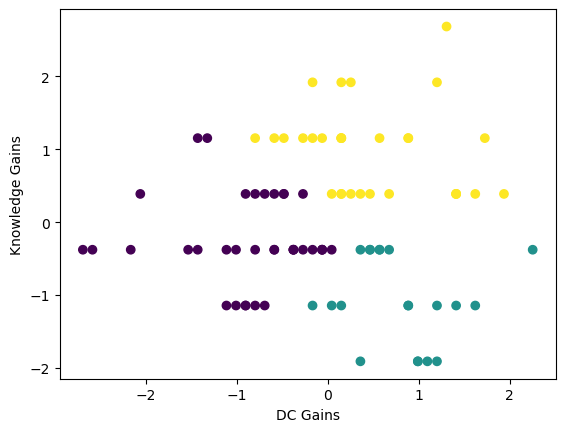

In [18]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_)
plt.xlabel('DC Gains')  # Add x-axis label
plt.ylabel('Knowledge Gains')  # Add y-axis label
plt.show()

In [19]:
cluster_stats = df.groupby('Cluster')[['DC_gains', 'Knowledge_gains']].describe()
print(cluster_stats)

        DC_gains                                                          \
           count       mean        std   min     25%   50%     75%   max   
Cluster                                                                    
0           35.0   3.142857  16.375004 -40.0  -2.500   5.0  15.000  25.0   
1           20.0  43.000000  13.707470  20.0  34.375  42.5  50.625  77.5   
2           30.0  35.666667  17.381785   5.0  25.625  30.0  50.625  70.0   

        Knowledge_gains                                                
                  count      mean       std  min   25%  50%  75%  max  
Cluster                                                                
0                  35.0  0.171429  0.785370 -1.0  0.00  0.0  1.0  2.0  
1                  20.0 -0.900000  0.788069 -2.0 -1.25 -1.0  0.0  0.0  
2                  30.0  1.800000  0.805156  1.0  1.00  2.0  2.0  4.0  


In [20]:
cluster_ranges = df.groupby('Cluster')[['DC_gains', 'Knowledge_gains']].agg(['min', 'max'])
print(cluster_ranges)

        DC_gains       Knowledge_gains    
             min   max             min max
Cluster                                   
0          -40.0  25.0              -1   2
1           20.0  77.5              -2   0
2            5.0  70.0               1   4


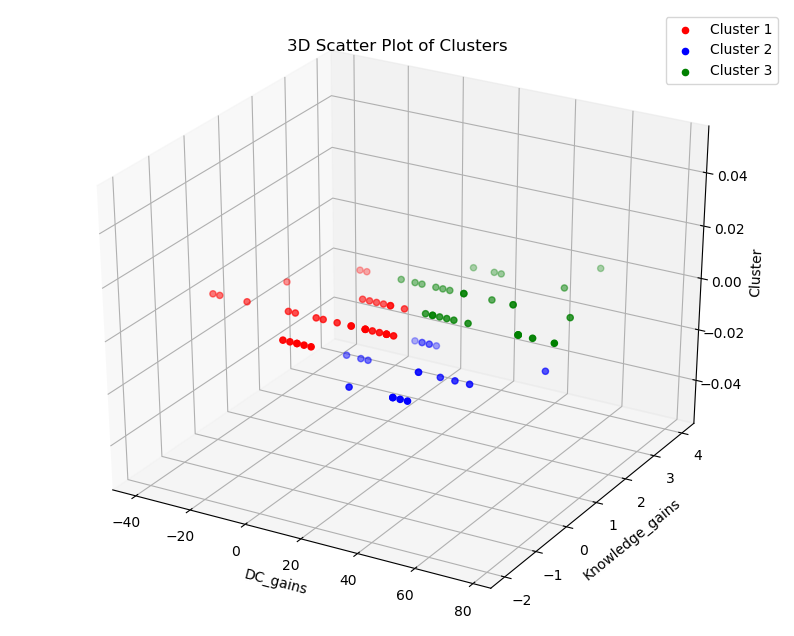

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with clusters
cluster1 = df[df['Cluster'] == 0]
cluster2 = df[df['Cluster'] == 1]
cluster3 = df[df['Cluster'] == 2]

ax.scatter(cluster1['DC_gains'], cluster1['Knowledge_gains'], c='red', label='Cluster 1')
ax.scatter(cluster2['DC_gains'], cluster2['Knowledge_gains'], c='blue', label='Cluster 2')
ax.scatter(cluster3['DC_gains'], cluster3['Knowledge_gains'], c='green', label='Cluster 3')

# Set labels and title
ax.set_xlabel('DC_gains')
ax.set_ylabel('Knowledge_gains')
ax.set_zlabel('Cluster')
plt.title('3D Scatter Plot of Clusters')

# Add legend
ax.legend()

# Show the plot
plt.show()

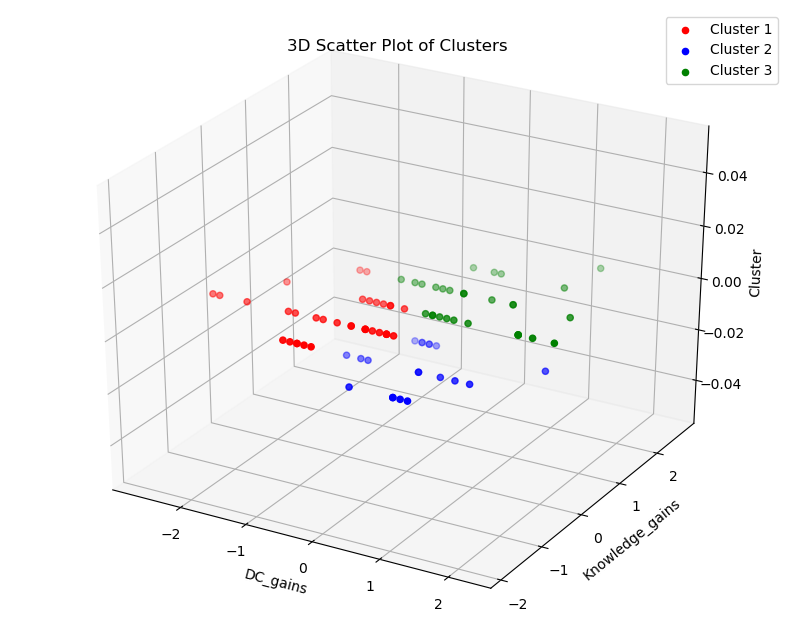

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with clusters
cluster1 = data_clean[data_clean['Cluster'] == 0]
cluster2 = data_clean[data_clean['Cluster'] == 1]
cluster3 = data_clean[data_clean['Cluster'] == 2]

ax.scatter(cluster1['DC_gains_scaled'], cluster1['Knowledge_gains_scaled'], c='red', label='Cluster 1')
ax.scatter(cluster2['DC_gains_scaled'], cluster2['Knowledge_gains_scaled'], c='blue', label='Cluster 2')
ax.scatter(cluster3['DC_gains_scaled'], cluster3['Knowledge_gains_scaled'], c='green', label='Cluster 3')

# Set labels and title
ax.set_xlabel('DC_gains')
ax.set_ylabel('Knowledge_gains')
ax.set_zlabel('Cluster')
plt.title('3D Scatter Plot of Clusters')

# Add legend
ax.legend()

# Show the plot
plt.show()

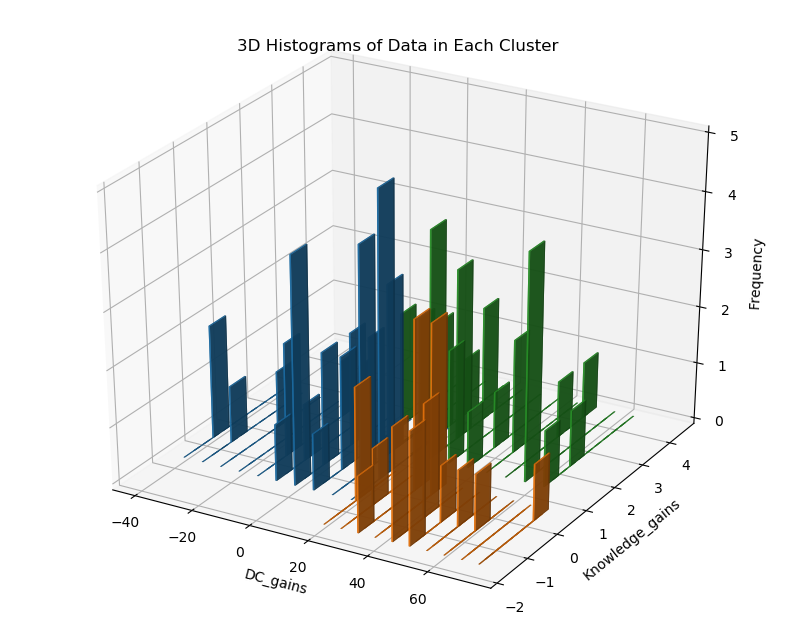

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

K = 3

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D histograms for each cluster
for cluster_label in range(K):
    cluster_data = df[df['Cluster'] == cluster_label]
    hist, xedges, yedges = np.histogram2d(cluster_data['DC_gains'], cluster_data['Knowledge_gains'], bins=10)
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0
    dx = dy = 0.5
    dz = hist.ravel()
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', alpha=0.8)

# Set labels and title
ax.set_xlabel('DC_gains')
ax.set_ylabel('Knowledge_gains')
ax.set_zlabel('Frequency')
plt.title('3D Histograms of Data in Each Cluster')

# Show the plot
plt.show()

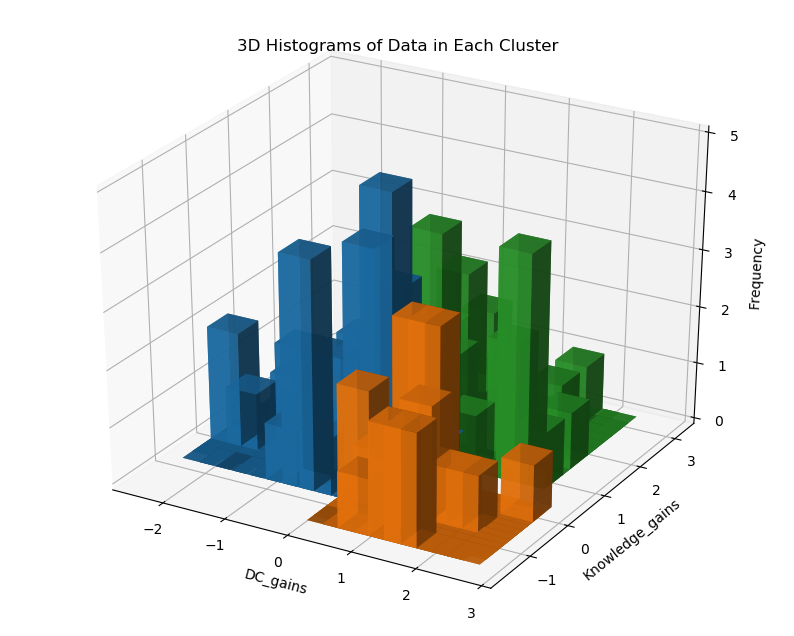

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

K = 3

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D histograms for each cluster
for cluster_label in range(K):
    cluster_data = data_clean[data_clean['Cluster'] == cluster_label]
    hist, xedges, yedges = np.histogram2d(cluster_data['DC_gains_scaled'], cluster_data['Knowledge_gains_scaled'], bins=10)
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0
    dx = dy = 0.5
    dz = hist.ravel()
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', alpha=0.8)

# Set labels and title
ax.set_xlabel('DC_gains')
ax.set_ylabel('Knowledge_gains')
ax.set_zlabel('Frequency')
plt.title('3D Histograms of Data in Each Cluster')

# Show the plot
plt.show()

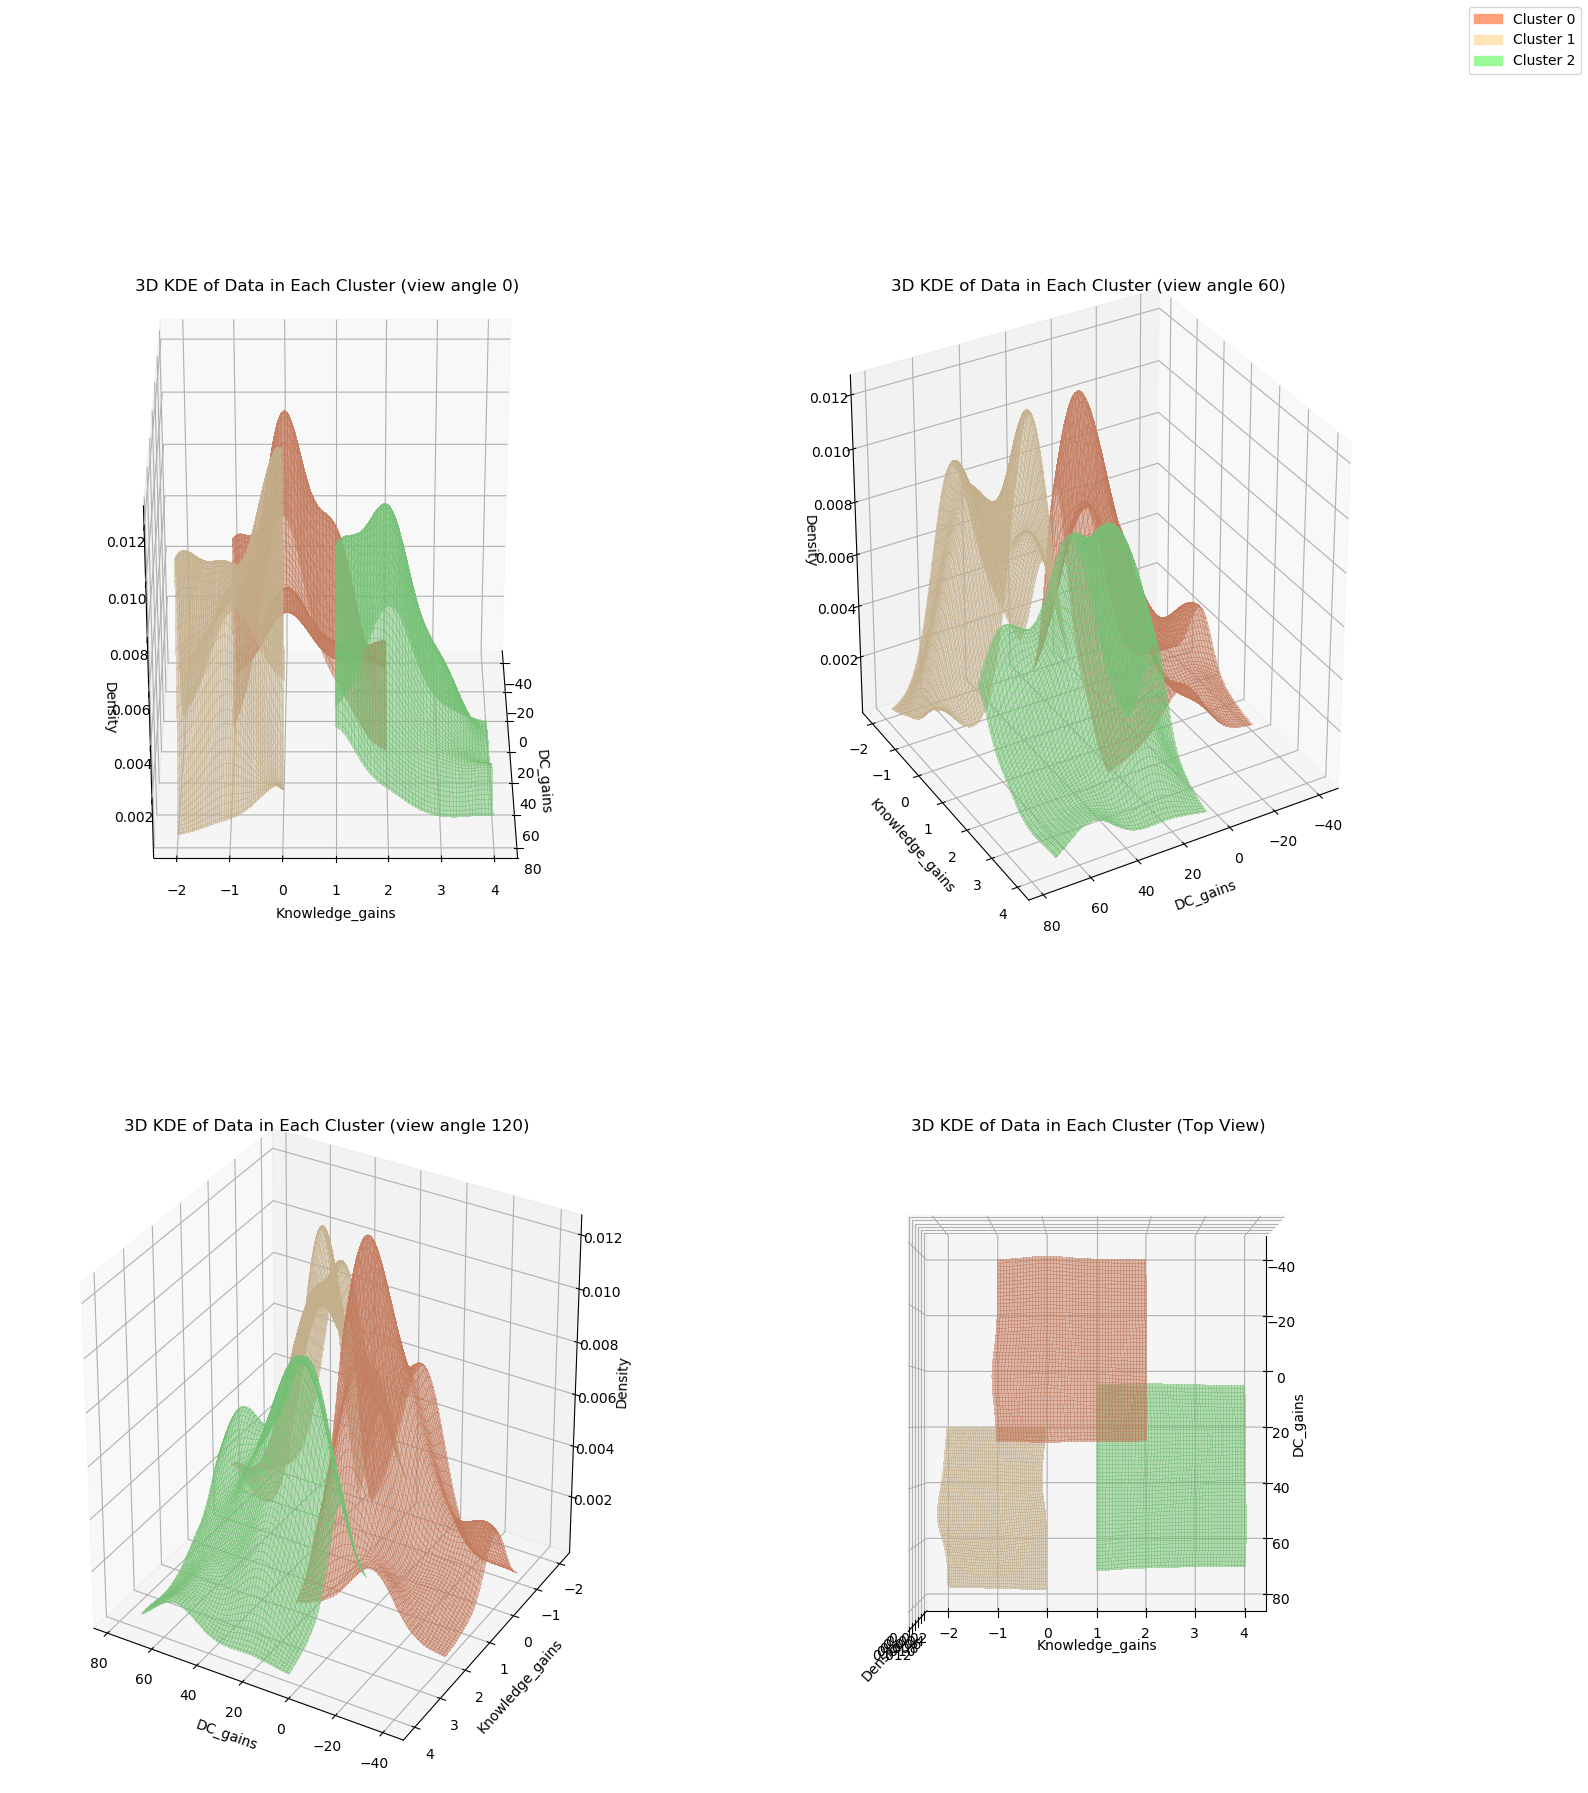

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np

# Define color map
colors = ['LightSalmon', 'Moccasin', 'PaleGreen']

# Create 3D figures
fig = plt.figure(figsize=(18, 20))

angles = [(30, angle * 60) for angle in range(3)] + [(90, 0)]
titles = [f'3D KDE of Data in Each Cluster (view angle {angle[1]})' for angle in angles[:-1]] + ['3D KDE of Data in Each Cluster (Top View)']

for i, angle, title in zip(range(4), angles, titles):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')

    # Plot 3D KDE for each cluster
    for cluster_label in range(K):
        cluster_data = df[df['Cluster'] == cluster_label]

        # Create a Gaussian Kernel
        kernel = gaussian_kde(np.vstack([cluster_data['DC_gains'], cluster_data['Knowledge_gains']]))

        # Create a grid of sample points
        x = np.linspace(cluster_data['DC_gains'].min(), cluster_data['DC_gains'].max(), 100)
        y = np.linspace(cluster_data['Knowledge_gains'].min(), cluster_data['Knowledge_gains'].max(), 100)
        X, Y = np.meshgrid(x,y)
        positions = np.vstack([X.ravel(), Y.ravel()])

        # Evaluate the kernel on the grid
        Z = np.reshape(kernel(positions).T, X.shape)

        # Plot the surface
        ax.plot_surface(X, Y, Z, color=colors[cluster_label], linewidth=0, antialiased=False, alpha=0.5)

    # Set labels and title
    ax.set_xlabel('DC_gains')
    ax.set_ylabel('Knowledge_gains')
    ax.set_zlabel('Density')
    ax.set_title(title)

    # Set viewing angle
    ax.view_init(angle[0], angle[1])

# Create a legend
import matplotlib.patches as mpatches
patch1 = mpatches.Patch(color='LightSalmon', label='Cluster 0')
patch2 = mpatches.Patch(color='Moccasin', label='Cluster 1')
patch3 = mpatches.Patch(color='PaleGreen', label='Cluster 2')
fig.legend(handles=[patch1, patch2, patch3])

# Show the plot
plt.show()

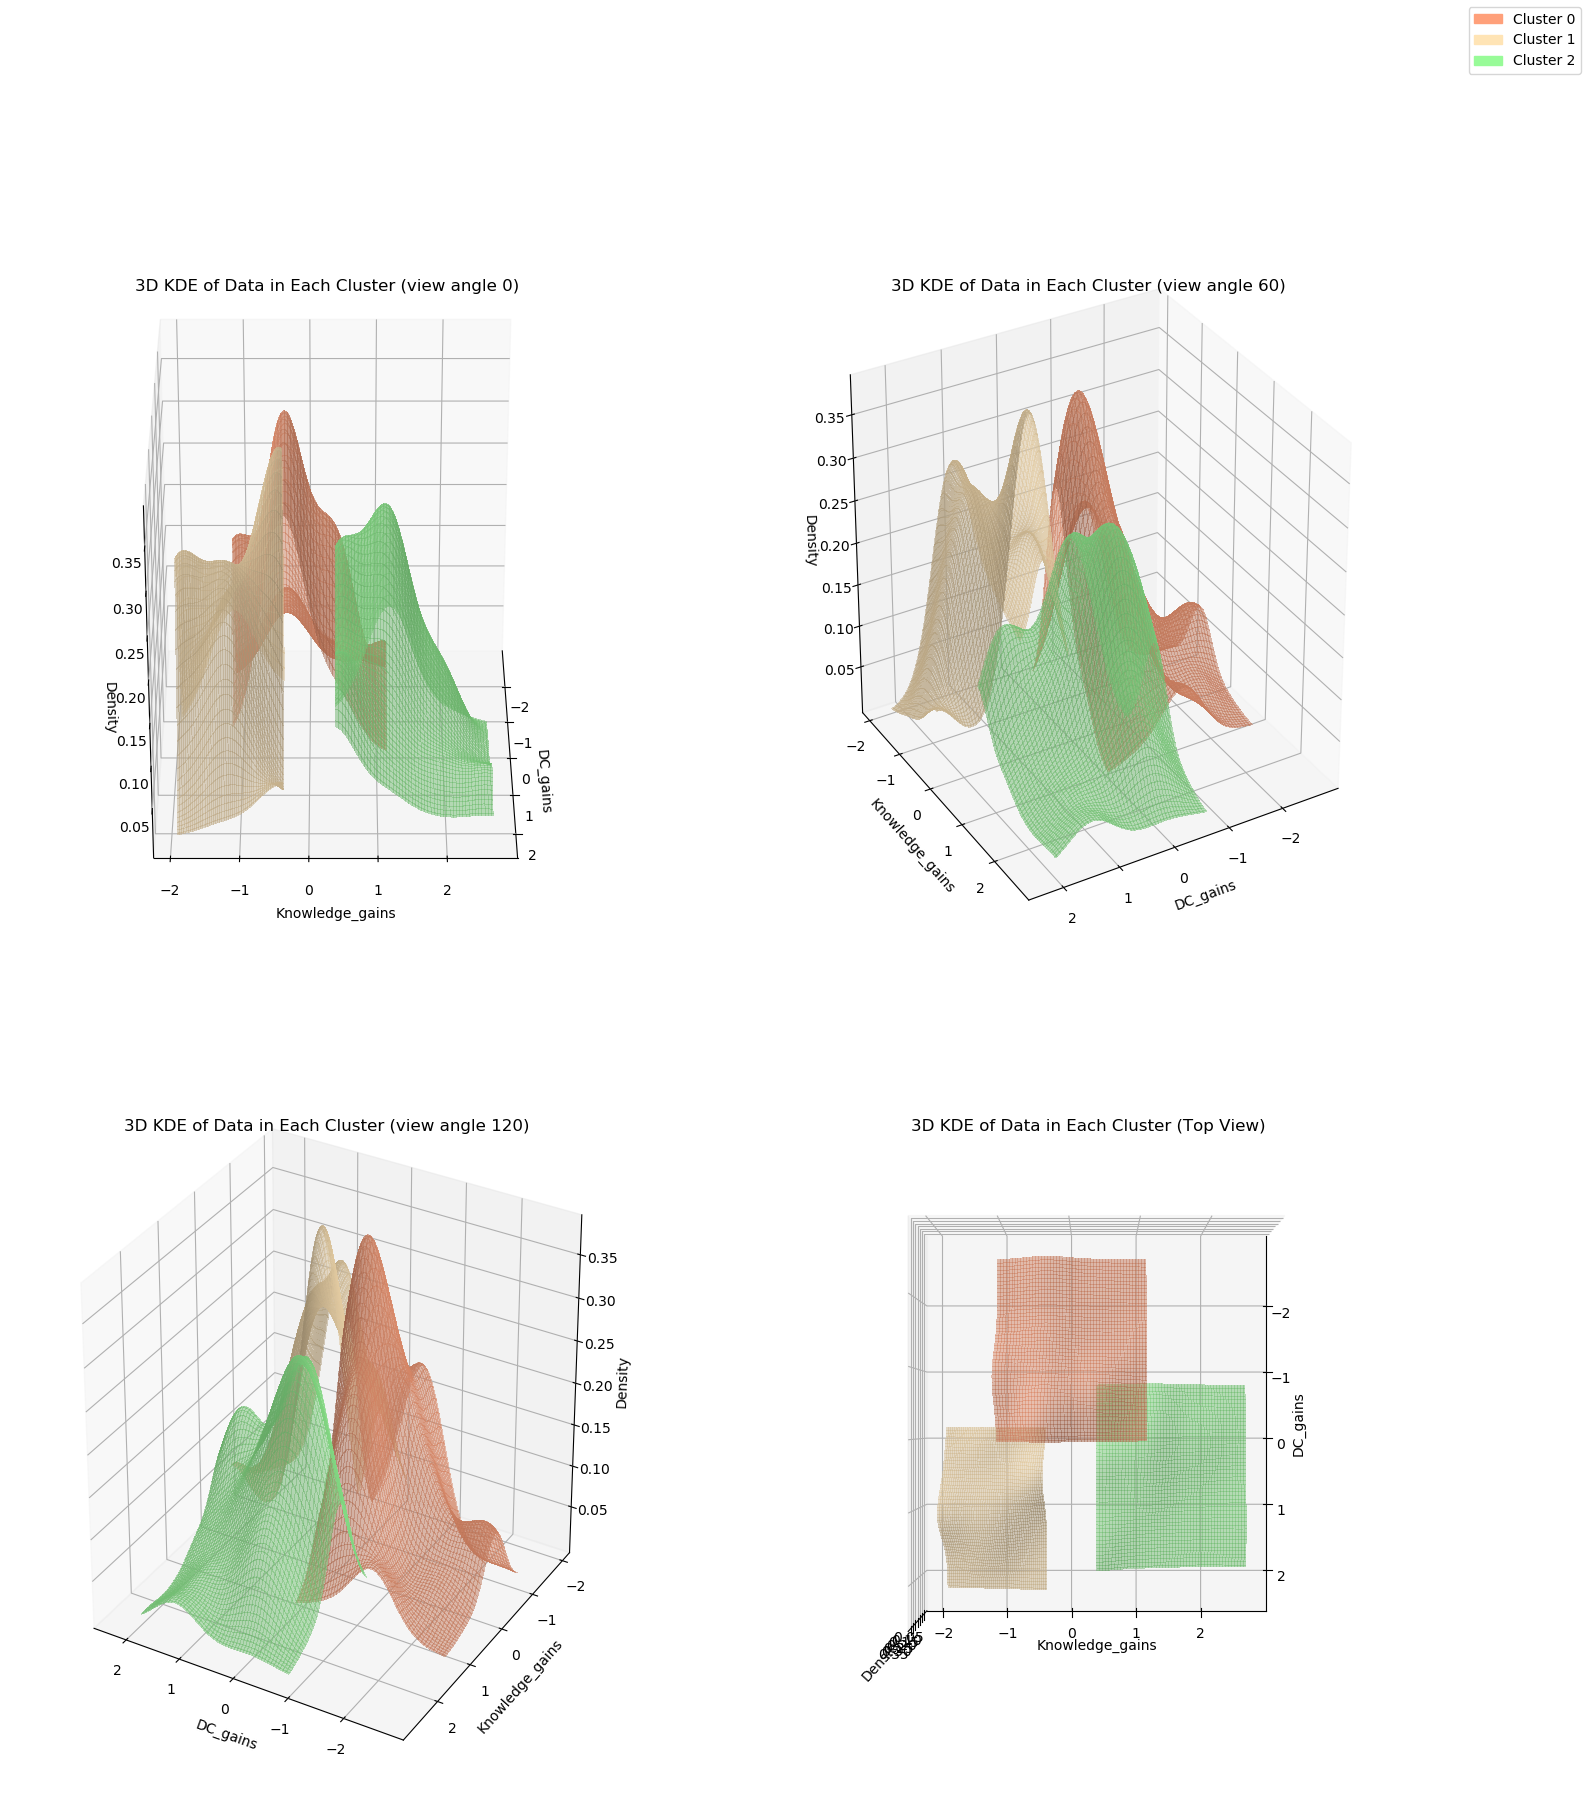

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np

# Define color map
colors = ['LightSalmon', 'Moccasin', 'PaleGreen']

# Create 3D figures
fig = plt.figure(figsize=(18, 20))

angles = [(30, angle * 60) for angle in range(3)] + [(90, 0)]
titles = [f'3D KDE of Data in Each Cluster (view angle {angle[1]})' for angle in angles[:-1]] + ['3D KDE of Data in Each Cluster (Top View)']

for i, angle, title in zip(range(4), angles, titles):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')

    # Plot 3D KDE for each cluster
    for cluster_label in range(K):
        cluster_data = data_clean[data_clean['Cluster'] == cluster_label]

        # Create a Gaussian Kernel
        kernel = gaussian_kde(np.vstack([cluster_data['DC_gains_scaled'], cluster_data['Knowledge_gains_scaled']]))

        # Create a grid of sample points
        x = np.linspace(cluster_data['DC_gains_scaled'].min(), cluster_data['DC_gains_scaled'].max(), 100)
        y = np.linspace(cluster_data['Knowledge_gains_scaled'].min(), cluster_data['Knowledge_gains_scaled'].max(), 100)
        X, Y = np.meshgrid(x,y)
        positions = np.vstack([X.ravel(), Y.ravel()])

        # Evaluate the kernel on the grid
        Z = np.reshape(kernel(positions).T, X.shape)

        # Plot the surface
        ax.plot_surface(X, Y, Z, color=colors[cluster_label], linewidth=0, antialiased=False, alpha=0.5)

    # Set labels and title
    ax.set_xlabel('DC_gains')
    ax.set_ylabel('Knowledge_gains')
    ax.set_zlabel('Density')
    ax.set_title(title)

    # Set viewing angle
    ax.view_init(angle[0], angle[1])

# Create a legend
import matplotlib.patches as mpatches
patch1 = mpatches.Patch(color='LightSalmon', label='Cluster 0')
patch2 = mpatches.Patch(color='Moccasin', label='Cluster 1')
patch3 = mpatches.Patch(color='PaleGreen', label='Cluster 2')
fig.legend(handles=[patch1, patch2, patch3])

# Show the plot
plt.show()

**Data Distribution**

**Histograms**:
Histograms can provide a visual representation of the distribution of a single variable. You can create separate histograms for each cluster to compare the distributions of "DC_gains" and "Knowledge_gains" across the groups. Here's an example:

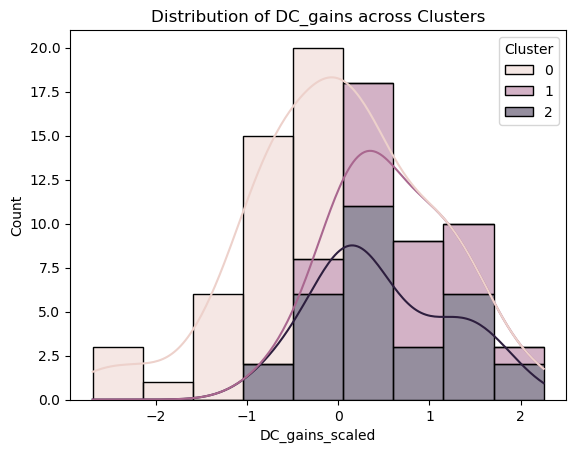

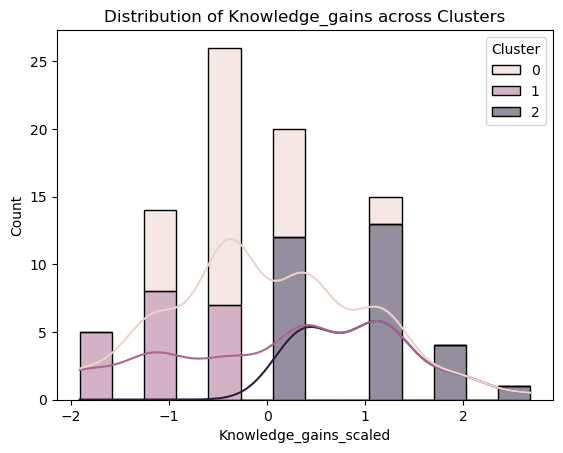

In [27]:
import seaborn as sns

# Plot histograms for each cluster
sns.histplot(data=data_clean, x='DC_gains_scaled', hue='Cluster', multiple='stack', kde=True)
plt.title('Distribution of DC_gains across Clusters')
plt.show()

sns.histplot(data=data_clean, x='Knowledge_gains_scaled', hue='Cluster', multiple='stack', kde=True)
plt.title('Distribution of Knowledge_gains across Clusters')
plt.show()

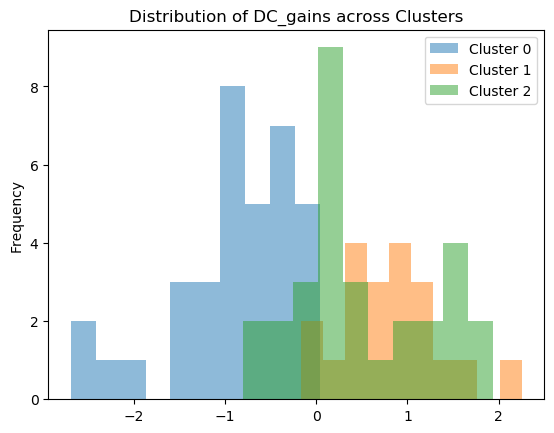

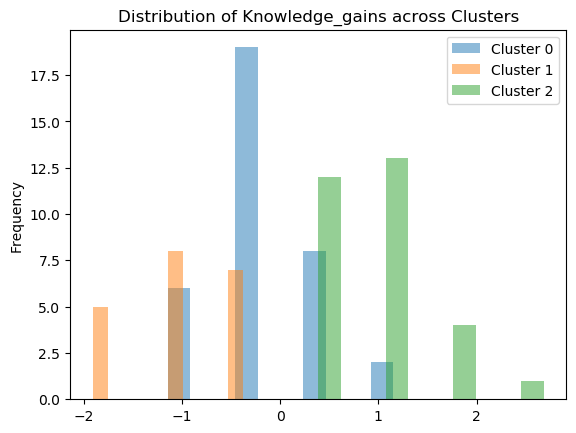

In [28]:
data_clean[data_clean['Cluster'] == 0]['DC_gains_scaled'].plot.hist(alpha=0.5, label='Cluster 0')
data_clean[data_clean['Cluster'] == 1]['DC_gains_scaled'].plot.hist(alpha=0.5, label='Cluster 1')
data_clean[data_clean['Cluster'] == 2]['DC_gains_scaled'].plot.hist(alpha=0.5, label='Cluster 2')
plt.title('Distribution of DC_gains across Clusters')
plt.legend()
plt.show()

data_clean[data_clean['Cluster'] == 0]['Knowledge_gains_scaled'].plot.hist(alpha=0.5, label='Cluster 0')
data_clean[data_clean['Cluster'] == 1]['Knowledge_gains_scaled'].plot.hist(alpha=0.5, label='Cluster 1')
data_clean[data_clean['Cluster'] == 2]['Knowledge_gains_scaled'].plot.hist(alpha=0.5, label='Cluster 2')
plt.title('Distribution of Knowledge_gains across Clusters')
plt.legend()
plt.show()

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.
/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

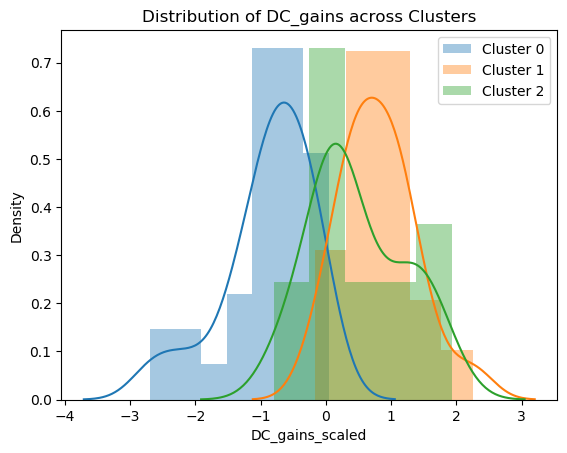

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == "__main__":
/Users/andriykashyrs

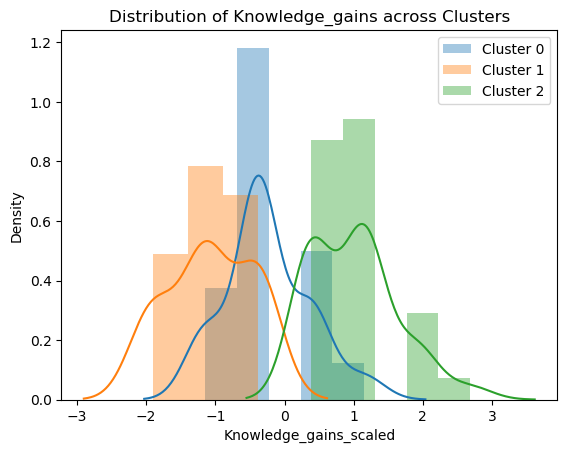

In [29]:
sns.distplot(data_clean[data_clean['Cluster'] == 0]['DC_gains_scaled'], kde=True, label='Cluster 0')
sns.distplot(data_clean[data_clean['Cluster'] == 1]['DC_gains_scaled'], kde=True, label='Cluster 1')
sns.distplot(data_clean[data_clean['Cluster'] == 2]['DC_gains_scaled'], kde=True, label='Cluster 2')
plt.title('Distribution of DC_gains across Clusters')
plt.legend()
plt.show()

sns.distplot(data_clean[data_clean['Cluster'] == 0]['Knowledge_gains_scaled'], kde=True, label='Cluster 0')
sns.distplot(data_clean[data_clean['Cluster'] == 1]['Knowledge_gains_scaled'], kde=True, label='Cluster 1')
sns.distplot(data_clean[data_clean['Cluster'] == 2]['Knowledge_gains_scaled'], kde=True, label='Cluster 2')
plt.title('Distribution of Knowledge_gains across Clusters')
plt.legend()
plt.show()

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.
/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

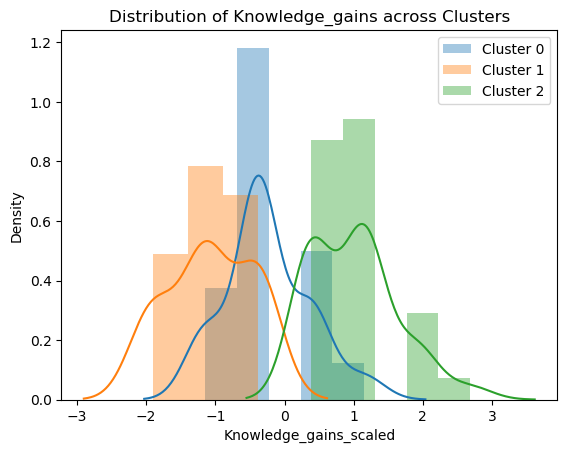

In [30]:
sns.distplot(data_clean[data_clean['Cluster'] == 0]['Knowledge_gains_scaled'], kde=True, label='Cluster 0')
sns.distplot(data_clean[data_clean['Cluster'] == 1]['Knowledge_gains_scaled'], kde=True, label='Cluster 1')
sns.distplot(data_clean[data_clean['Cluster'] == 2]['Knowledge_gains_scaled'], kde=True, label='Cluster 2')
plt.title('Distribution of Knowledge_gains across Clusters')
plt.legend()
plt.show()

## 6. Epistemic Network Analysis

These participants are missing in the cluster dataset:
CP5S5, CP3S13, BP1S3, CP4S32, CP3S7, BP1S16, CP4S11, CP4S2, MP6S6, BP2S9, CP4S15, CP6S26, CP4S20, MP6S5, BP1S23


/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:235: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)
/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1120: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable inst

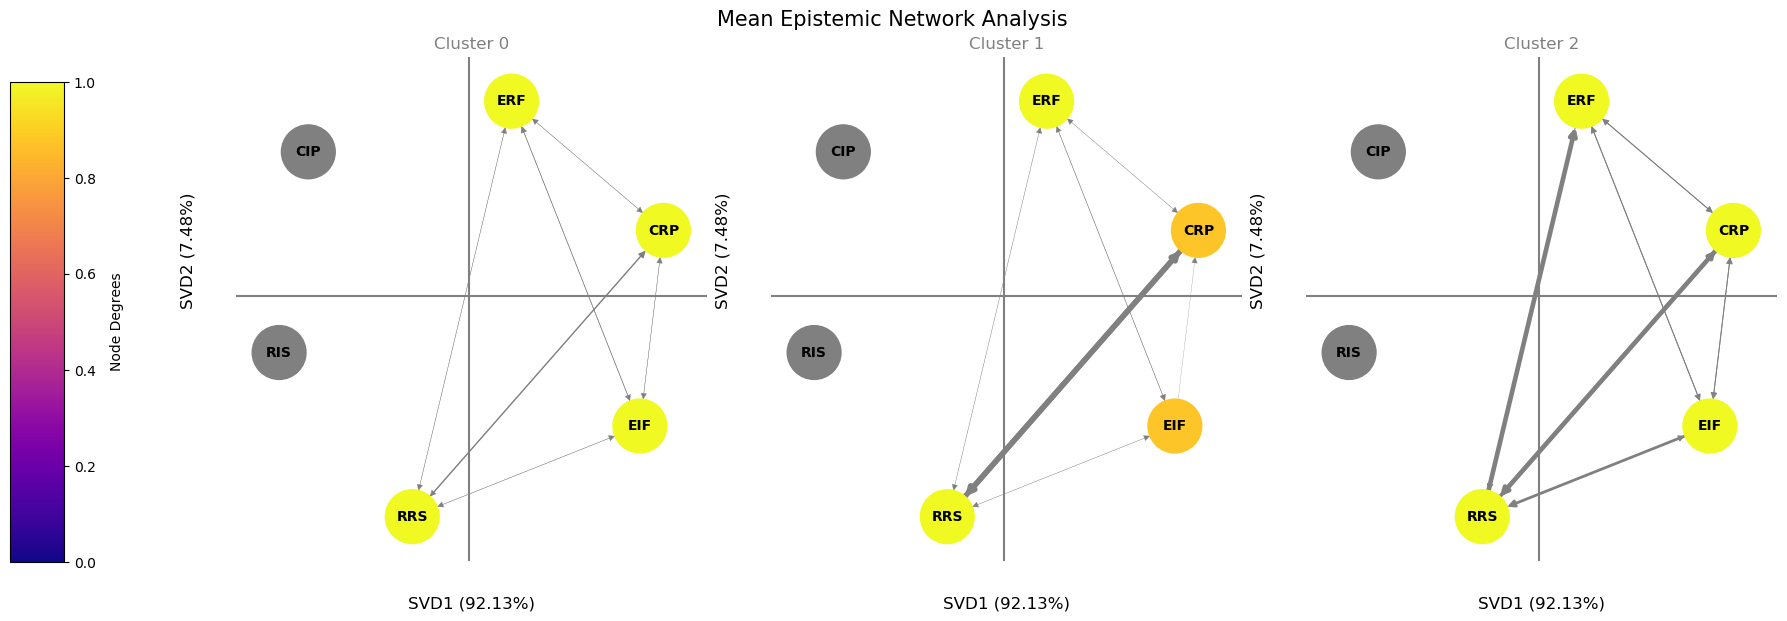

In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
from matplotlib import cm

# Read data
log_data = pd.read_csv("solar_farm_log_data.csv")
clusters = pd.read_csv("gains_and_clusters_cleaned.csv")

# Unique IDs in each dataset
data_ids = set(log_data["ID"].unique())
cluster_ids = set(clusters["ID"].unique())

# Participants not in the cluster dataset
missing_in_clusters = data_ids - cluster_ids

if missing_in_clusters:
    print("These participants are missing in the cluster dataset:")
    print(", ".join(map(str, missing_in_clusters)))
else:
    print("All participants in the data are matched with a cluster.")

# Remove participants in the data who are not in the cluster results
data_filt = log_data[log_data["ID"].isin(clusters["ID"])]
data = data_filt[data_filt["Coded Action"] != "HKA"]

# Merge the data with the clusters
merged_data = pd.merge(data, clusters, on="ID", how='inner')

# Network categories
G = nx.DiGraph()
categories = {
    "ERF": "Explore Relevant Features",
    "EIF": "Explore Irrelevant Features",
    "RRS": "Run Relevant Simulation",
    "RIS": "Run Irrelevant Simulation",
    "CRP": "Change Relevant Parameters",
    "CIP": "Change Irrelevant Parameters"
    #"HKA": "House Keeping Actions"
}

for code, label in categories.items():
    G.add_node(code, label=label)

# Compute the SVD of the adjacency matrix of the aggregate network
networks = []
for participant_id, group in merged_data.groupby("ID"):
    sample_G = G.copy()
    previous_action = None
    for _, row in group.iterrows():
        action = row["Coded Action"]
        if previous_action is not None:
            if sample_G.has_edge(previous_action, action):
                sample_G[previous_action][action]['weight'] += 1
            else:
                sample_G.add_edge(previous_action, action, weight=1)
        previous_action = action
    networks.append(sample_G)

aggregate_network = nx.compose_all(networks) if networks else G
aggregate_network = nx.DiGraph(aggregate_network)
aggregate_adjacency = nx.to_numpy_array(aggregate_network)
svd_all = TruncatedSVD(n_components=2)
svd_all.fit(aggregate_adjacency)

# Cluster colors
cluster_colors = ["grey", "grey", "grey"]

# Produce visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
fig.suptitle("Mean Epistemic Network Analysis", y=1.02, fontsize = 15)  # adjust y for better title location

# Compute the node positions once and use them for all clusters
pos = nx.spring_layout(G, seed=42)

# Define a color map for the clusters
cluster_title_colors = {
    0: "grey",
    1: "grey",
    2: "grey"
}

for i, cluster_id in enumerate(sorted(merged_data["Cluster"].dropna().unique())):  
    ax = axes[i]
    ax.axis("off")
    ax.set_title(f"Cluster {cluster_id}", color=cluster_title_colors[cluster_id])
    
    cluster_data = merged_data[merged_data["Cluster"] == cluster_id]
    
    sample_networks = []
    for participant_id, group in cluster_data.groupby("ID"):
        sample_G = G.copy()
        previous_action = None
        for _, row in group.iterrows():
            action = row["Coded Action"]
            if previous_action is not None:
                if sample_G.has_edge(previous_action, action):
                    sample_G[previous_action][action]['weight'] += 1
                else:
                    sample_G.add_edge(previous_action, action, weight=1)
            previous_action = action
        sample_networks.append(sample_G)

    mean_network = nx.compose_all(sample_networks) if sample_networks else G
    mean_network = nx.DiGraph(mean_network)
    adjacency_matrix = nx.to_numpy_array(mean_network)

    projected_adjacency = svd_all.transform(adjacency_matrix)

    node_degrees = [d for n, d in mean_network.degree()]
    edge_weights = [mean_network[u][v]['weight'] for u, v in mean_network.edges()]
    max_edge_weight = max(edge_weights)
    max_node_degree = max([d for n, d in aggregate_network.degree()])

    node_colors = ['grey' if degree == 0 else plt.cm.plasma(degree/max_node_degree) for degree in node_degrees]
    nx.draw_networkx(mean_network, pos, with_labels=True, node_color=node_colors, node_size=1500, 
                 edge_color=cluster_colors[i],  # use cluster-specific color
                 width=[4*weight/max_edge_weight for weight in edge_weights],  # normalize edge width
                 font_size=10, font_weight="bold", ax=ax)
    
    explained_variances = svd_all.explained_variance_ratio_ * 100

    x_var = explained_variances[0]
    x_label = f"SVD1 ({x_var:.2f}%)"
    ax.set_xlabel(x_label)
    
    y_var = explained_variances[1]
    y_label = f"SVD2 ({y_var:.2f}%)"
    ax.set_ylabel(y_label)
    
    explained_variances = svd_all.explained_variance_ratio_ * 100

    x_var = explained_variances[0]
    x_label = f"SVD1 ({x_var:.2f}%)"
    ax.axhline(y=0, color='grey', linestyle='-')

    y_var = explained_variances[1]
    y_label = f"SVD2 ({y_var:.2f}%)"
    ax.axvline(x=0, color='grey', linestyle='-')

    ax.text(0.5, -0.1, x_label, va='bottom', ha='center', 
            fontsize=12, transform=ax.transAxes)
    ax.text(-0.1, 0.5, y_label, va='bottom', ha='center', 
            fontsize=12, rotation='vertical', transform=ax.transAxes)

# Define a new Axes where the colorbar will be drawn
cbar_ax = fig.add_axes([0.01, 0.1, 0.03, 0.8])  # left, bottom, width, height

cbar = plt.colorbar(cm.ScalarMappable(cmap=plt.cm.plasma), cax=cbar_ax, 
                    orientation='vertical', label="Node Degrees")

# Add some padding between colorbar and label
cbar.ax.yaxis.labelpad = 10

# Improve layout
plt.tight_layout(rect=[0.1, 0, 1, 1])  # Adjust the rectangle used to fit the subplots to leave space for colorbar
plt.show()

In [32]:
# RIS and CIP are removed due to frequency of 0

# Summarize data distribution for each cluster
for i, cluster_id in enumerate(sorted(merged_data["Cluster"].dropna().unique())):
    cluster_data = merged_data[merged_data["Cluster"] == cluster_id]
    category_counts = cluster_data['Coded Action'].value_counts()
    category_percentages = cluster_data['Coded Action'].value_counts(normalize=True) * 100
    print(f"\nCluster {cluster_id}:")
    print("Category Counts (with percentages):")
    for category in category_counts.index:
        print(f"{category}: {category_counts[category]} ({category_percentages[category]:.2f}%)")


Cluster 0:
Category Counts (with percentages):
CRP: 527 (45.71%)
RRS: 519 (45.01%)
ERF: 78 (6.76%)
EIF: 29 (2.52%)

Cluster 1:
Category Counts (with percentages):
CRP: 180 (46.27%)
RRS: 151 (38.82%)
ERF: 49 (12.60%)
EIF: 9 (2.31%)

Cluster 2:
Category Counts (with percentages):
RRS: 664 (48.08%)
CRP: 594 (43.01%)
ERF: 111 (8.04%)
EIF: 12 (0.87%)


Node Degree Distribution:
Degree 0: 2 node(s)
Degree 8: 4 node(s)

Edge Weight Distribution:
Weight 1: 9 edge(s)
Weight 3: 3 edge(s)
Weight 4: 1 edge(s)
Weight 5: 2 edge(s)
Weight 6: 1 edge(s)

Clustering Coefficients:
Node ERF: 1.00
Node EIF: 1.00
Node RRS: 1.00
Node RIS: 0.00
Node CRP: 1.00
Node CIP: 0.00

Network Density: 0.53

Degree Centralities:
Node ERF: 1.60
Node EIF: 1.60
Node RRS: 1.60
Node RIS: 0.00
Node CRP: 1.60
Node CIP: 0.00

Betweenness Centralities:
Node ERF: 0.00
Node EIF: 0.00
Node RRS: 0.00
Node RIS: 0.00
Node CRP: 0.00
Node CIP: 0.00

Closeness Centralities:
Node ERF: 0.60
Node EIF: 0.60
Node RRS: 0.60
Node RIS: 0.00
Node CRP: 0.60
Node CIP: 0.00


/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



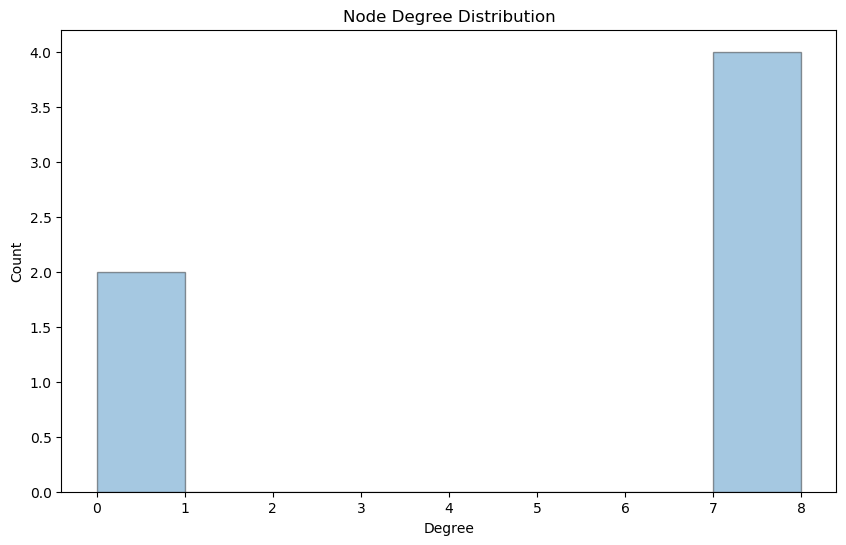

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



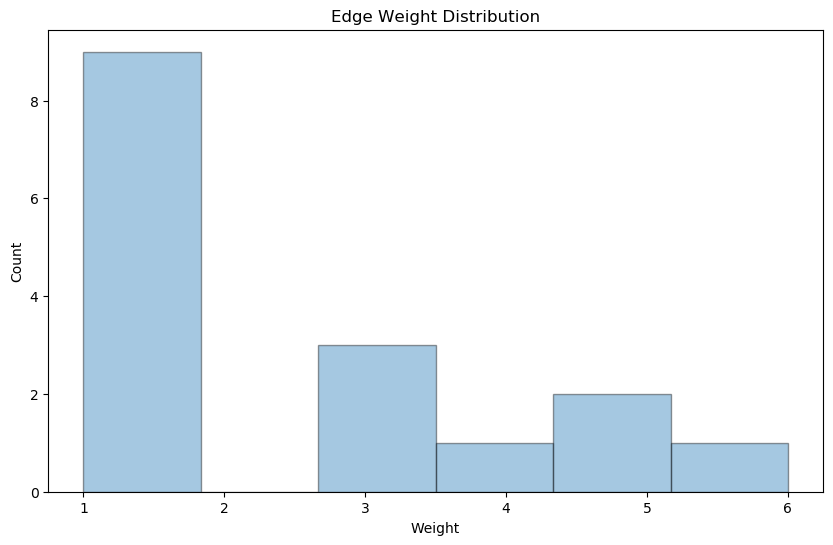

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



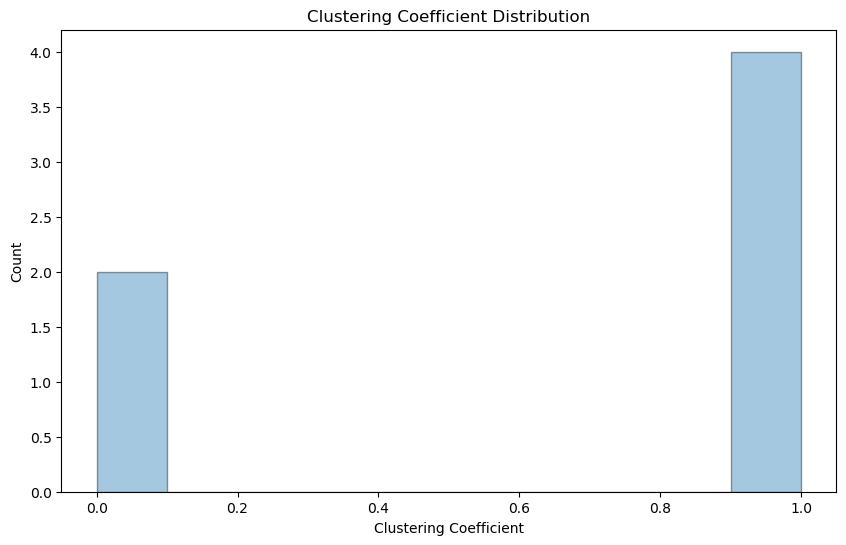

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



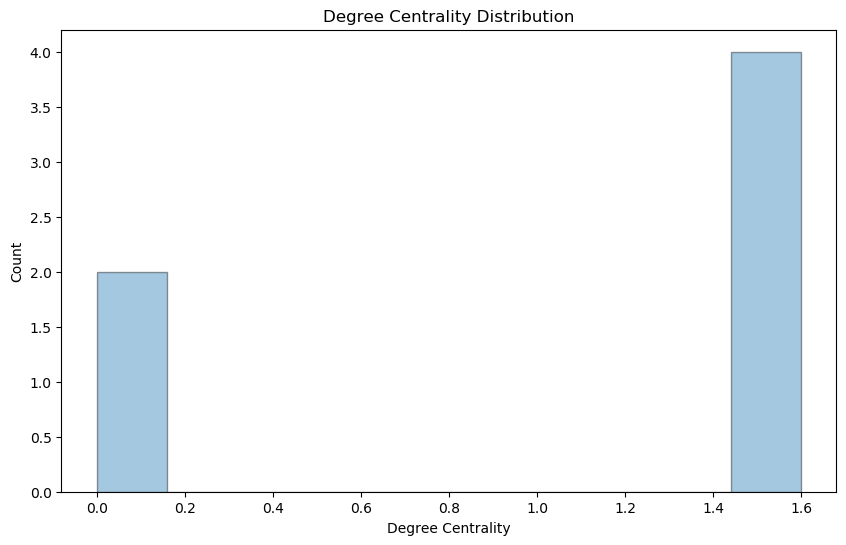

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



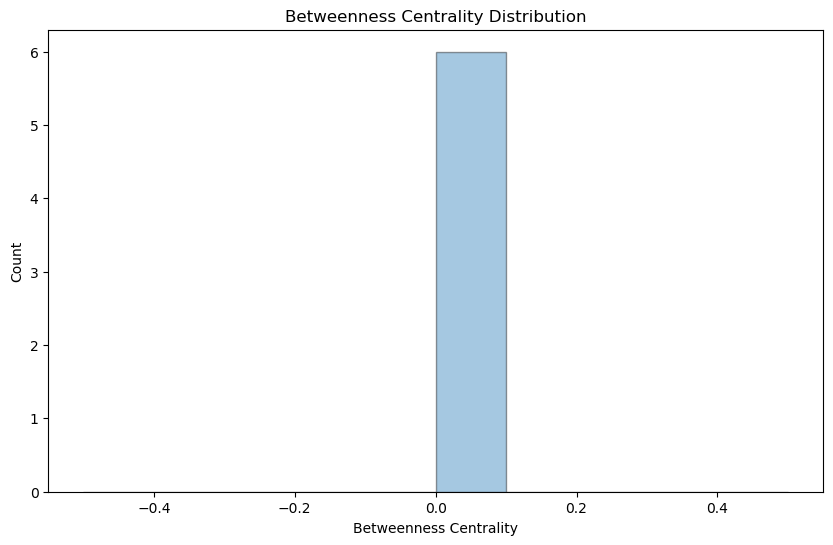

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



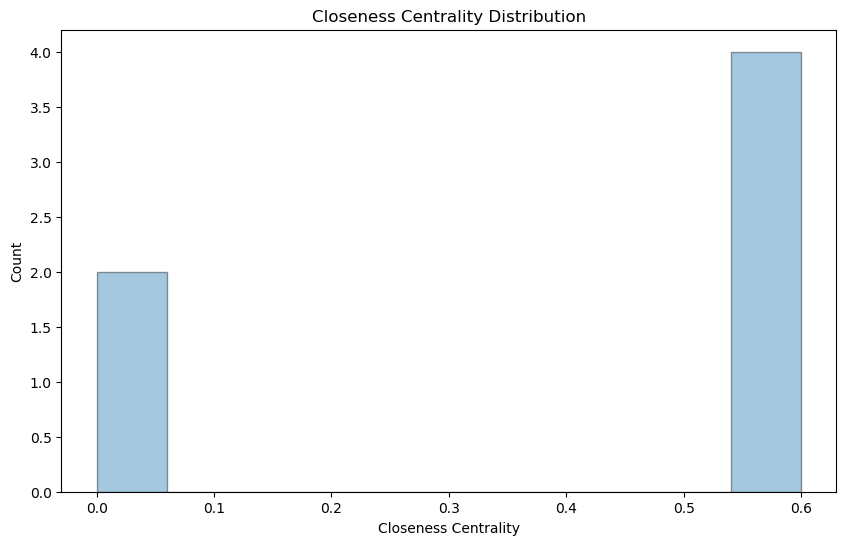

In [33]:
# import seaborn as sns
from collections import Counter
from networkx.algorithms import centrality, cluster

# Node Degree Distribution
node_degrees = [d for n, d in mean_network.degree()]
degree_counts = Counter(node_degrees)
print("Node Degree Distribution:")
for degree, count in sorted(degree_counts.items()):
    print(f"Degree {degree}: {count} node(s)")

# Edge Weight Distribution
edge_weights = [mean_network[u][v]['weight'] for u, v in mean_network.edges()]
weight_counts = Counter(edge_weights)
print("\nEdge Weight Distribution:")
for weight, count in sorted(weight_counts.items()):
    print(f"Weight {weight}: {count} edge(s)")

# Clustering Coefficient
clustering_coefficients = cluster.clustering(mean_network)
print("\nClustering Coefficients:")
for node, coeff in clustering_coefficients.items():
    print(f"Node {node}: {coeff:.2f}")
    
# Network Density
network_density = nx.density(mean_network)
print(f"\nNetwork Density: {network_density:.2f}")

# Degree Centrality
degree_centralities = centrality.degree_centrality(mean_network)
print("\nDegree Centralities:")
for node, centrality_measure in degree_centralities.items():
    print(f"Node {node}: {centrality_measure:.2f}")

# Betweenness Centrality
betweenness_centralities = centrality.betweenness_centrality(mean_network)
print("\nBetweenness Centralities:")
for node, centrality_measure in betweenness_centralities.items():
    print(f"Node {node}: {centrality_measure:.2f}")

# Closeness Centrality
closeness_centralities = centrality.closeness_centrality(mean_network)
print("\nCloseness Centralities:")
for node, centrality_measure in closeness_centralities.items():
    print(f"Node {node}: {centrality_measure:.2f}")

# Node Degree Distribution
plt.figure(figsize=(10,6))
sns.distplot(node_degrees, bins=max(node_degrees), kde=False, hist_kws=dict(edgecolor="k"))
plt.title("Node Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

# Edge Weight Distribution
plt.figure(figsize=(10,6))
sns.distplot(edge_weights, bins=max(edge_weights), kde=False, hist_kws=dict(edgecolor="k"))
plt.title("Edge Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.show()

# Clustering Coefficient
plt.figure(figsize=(10,6))
sns.distplot(list(clustering_coefficients.values()), bins=10, kde=False, hist_kws=dict(edgecolor="k"))
plt.title("Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Count")
plt.show()

# Degree Centrality
plt.figure(figsize=(10,6))
sns.distplot(list(degree_centralities.values()), bins=10, kde=False, hist_kws=dict(edgecolor="k"))
plt.title("Degree Centrality Distribution")
plt.xlabel("Degree Centrality")
plt.ylabel("Count")
plt.show()

# Betweenness Centrality
plt.figure(figsize=(10,6))
sns.distplot(list(betweenness_centralities.values()), bins=10, kde=False, hist_kws=dict(edgecolor="k"))
plt.title("Betweenness Centrality Distribution")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Count")
plt.show()

# Closeness Centrality
plt.figure(figsize=(10,6))
sns.distplot(list(closeness_centralities.values()), bins=10, kde=False, hist_kws=dict(edgecolor="k"))
plt.title("Closeness Centrality Distribution")
plt.xlabel("Closeness Centrality")
plt.ylabel("Count")
plt.show()

In [34]:
import pandas as pd

# Get the count of unique IDs
unique_id_count = log_data['ID'].nunique()

# Get summary statistics for the ID column
id_summary_statistics = log_data['ID'].describe()

# Print the count of unique IDs and summary statistics
print("Count of Unique IDs:", unique_id_count)
print("\nSummary Statistics for ID Column:")
print(id_summary_statistics)

data.head(5)

Count of Unique IDs: 100

Summary Statistics for ID Column:
count      4393
unique      100
top       MP6S5
freq        293
Name: ID, dtype: object


,ID,Absolute Time,File,Action,Type,Coded Action
0,BP1S1,1653312581250,westshore_default_small,move,action,CRP
1,BP1S1,1653312589487,westshore_default_small,move polygon,action,EIF
2,BP1S1,1653313099166,westshore_default_small,set solar panel tilt angle,action,CRP
3,BP1S1,1653313131223,westshore_default_small,set solar panel tilt angle,action,CRP
4,BP1S1,1653313142645,westshore_default_small,show sun and time settings panel,action,ERF


In [35]:
import pandas as pd

# Get the count of unique IDs
cl_unique_id_count = clusters['ID'].nunique()

# Get summary statistics for the ID column
cl_id_summary_statistics = clusters['ID'].describe()

# Print the count of unique IDs and summary statistics
print("Count of Unique IDs:", cl_unique_id_count)
print("\nSummary Statistics for ID Column:")
print(cl_id_summary_statistics)

clusters.head(5)

Count of Unique IDs: 85

Summary Statistics for ID Column:
count         85
unique        85
top       CP4S14
freq           1
Name: ID, dtype: object


,ID,Cluster
0,CP4S14,0
1,CP4S19,0
2,CP4S16,1
3,CP4S8,0
4,CP4S24,0


---